In [32]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import classification_report


# <font color='red'>Tạo các hàm</font>

In [77]:
def euclidean_distance(point_1,point_2):
  euclid_square = 0
  for x,y in zip(point_1,point_2):
    euclid_square += (x-y)**2
  euclidean_dis = math.sqrt(euclid_square)
  return euclidean_dis

def most_frequent(List):
  return max(set(List), key = List.count)

In [78]:
a = [1,1,2,2,2,3,3,3,3,3,3,3,3]
most_frequent(a)

3

# <font color='green'>LINEAR REGRESSION</font>

## <font color='blue'> LR Data </font>

In [34]:
df_lr_data = pd.read_csv('Nhom11_LR_data.csv')
print(f'Dữ liệu gồm: {(df_lr_data.shape[0]):,} dòng và {df_lr_data.shape[1]} cột')
df_lr_data.head()

Dữ liệu gồm: 200 dòng và 4 cột


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [79]:
df_lr_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


## <font color='blue'> LR with sklearn </font>

In [35]:
from sklearn.linear_model import LinearRegression

### Tách X (các features để dự đoán), y giá trị output của phương trình dự đoán
X = df_lr_data.drop('sales',axis= 1)
y = df_lr_data['sales']
display(X)
display(y)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


0      2210
1      1040
2       930
3      1850
4      1290
       ... 
195     760
196     970
197    1280
198    2550
199    1340
Name: sales, Length: 200, dtype: int64

In [36]:
### Tách tập dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

df_predict = X_test
df_predict['Sales_Actual'] = y_test
df_predict['Sales_Predict_sklearn'] = predictions

df_predict

,TV,radio,newspaper,Sales_Actual,Sales_Predict_sklearn
126,7.8,38.9,50.6,660,1060.539733
104,238.2,34.3,5.3,2070,2018.503961
99,135.2,41.7,45.9,1720,1691.966540
92,217.7,33.5,59.0,1940,1913.765440
111,241.7,38.0,23.2,2180,2105.093184
167,206.8,5.2,19.4,1220,1329.921705
116,139.2,14.3,25.6,1220,1194.014411
96,197.6,3.5,5.9,1170,1255.285170
52,216.4,41.7,39.6,2260,2060.669083
69,216.8,43.9,27.2,2230,2103.019772


## <font color='blue'> LR với công thức toán học </font>

In [37]:
y = y_train
X = X_train

In [38]:
one = np.ones((X.shape[0], 1))
len(one)

180

In [39]:
y = y_train
X = X_train
one = np.ones((X.shape[0], 1))

Xbar = np.concatenate((one,X), axis =1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
w_0, w_1, w_2, w_3 = w[0],w[1],w[2],w[3]

print(f"Phương trình dự đoán y là : \n y = {round(w_0,2)} + {round(w_1,2)}.TV + {round(w_2,2)}.Radio + {round(w_3,2)}.Newspaper")

df_predict['Sales_Predict_math'] = df_predict.apply(lambda x: w_0 + w_1*x["TV"] + w_2*x['radio'] + w_3*x['newspaper'],  axis=1)

df_predict

Phương trình dự đoán y là : 
 y = 290.91 + 4.55.TV + 18.79.Radio + 0.06.Newspaper


,TV,radio,newspaper,Sales_Actual,Sales_Predict_sklearn,Sales_Predict_math
126,7.8,38.9,50.6,660,1060.539733,1060.539733
104,238.2,34.3,5.3,2070,2018.503961,2018.503961
99,135.2,41.7,45.9,1720,1691.966540,1691.966540
92,217.7,33.5,59.0,1940,1913.765440,1913.765440
111,241.7,38.0,23.2,2180,2105.093184,2105.093184
167,206.8,5.2,19.4,1220,1329.921705,1329.921705
116,139.2,14.3,25.6,1220,1194.014411,1194.014411
96,197.6,3.5,5.9,1170,1255.285170,1255.285170
52,216.4,41.7,39.6,2260,2060.669083,2060.669083
69,216.8,43.9,27.2,2230,2103.019772,2103.019772


In [40]:
### Sai số trung bình của phương trình LR bằng sklearn là:
round(math.sqrt(mean_squared_error(list(df_predict['Sales_Actual'].astype(float)),list(df_predict['Sales_Predict_sklearn'].astype(float)))),2)

135.46

In [41]:
### Sai số trung bình của phương trình LR bằng toán học là:
round(math.sqrt(mean_squared_error(list(df_predict['Sales_Actual'].astype(float)),list(df_predict['Sales_Predict_math'].astype(float)))),2)

135.46

# <font color='green'>KNN</font>

## <font color='blue'> KNN Data </font>

Data set gồm 9 features:
 - 8 features: về các chỉ số sức khỏe.
 - 1 features là labels chuẩn đoán cho các bệnh nhân (1 mắc bệnh tiểu đường, 0 là không mắc bệnh tiểu đường)

In [42]:
df_knn_data = pd.read_csv('Nhom11_KNN_data.csv')
print(f'Dữ liệu gồm: {(df_knn_data.shape[0]):,} dòng và {df_knn_data.shape[1]} cột')
df_knn_data.head()

Dữ liệu gồm: 768 dòng và 9 cột


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color='blue'> KNN with sklearn </font>

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
X = df_knn_data.drop('Outcome',axis= 1)
y = df_knn_data['Outcome']
display(X)
display(y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size=0.9)

scaler = StandardScaler()
df_train_scaled_fit = scaler.fit_transform(X_train)
df_test_scaled_fit = scaler.fit_transform(X_test)

df_train_scaled_fit = pd.DataFrame(df_train_scaled_fit)
df_train_scaled_fit.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

df_test_scaled_fit = pd.DataFrame(df_test_scaled_fit)
df_test_scaled_fit.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']


knn_classifier = KNeighborsClassifier(n_neighbors=3,p=2)
knn_classifier.fit(df_train_scaled_fit, y_train)

predictions = knn_classifier.predict(df_test_scaled_fit)

df_test_scaled_fit['Y_Actual'] = list(y_test)
df_test_scaled_fit['Y_Predict_sklearn'] = list(predictions)

df_test_scaled_fit

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y_Actual,Y_Predict_sklearn
0,-0.903391,-1.260135,-0.613450,1.374523,-0.313926,1.525497,0.691927,-0.792945,0,0
1,-1.167882,-1.056717,-0.149787,0.684123,-0.797171,0.376822,-0.931401,-0.648773,0,0
2,0.154573,1.151821,1.936696,-1.525155,-0.797171,0.660261,-1.252378,1.297547,1,0
3,0.948045,-1.666970,0.082044,0.062764,-0.797171,-0.190058,0.404155,0.576688,0,0
4,1.212536,0.018493,-0.033871,1.512602,0.149184,-0.025961,-0.429645,0.432516,0,1
...,...,...,...,...,...,...,...,...,...,...
72,-1.167882,0.425328,-0.149787,-0.558596,0.692834,-1.264144,-1.281893,-0.937117,0,0
73,-1.167882,-0.097746,-0.265703,0.338923,-0.797171,0.824358,-0.853924,-0.865031,0,0
74,2.006008,-1.114836,0.082044,0.615083,-0.797171,-0.533169,-0.713728,0.865031,1,0
75,-1.167882,0.134731,0.545707,1.029323,1.317026,0.451411,1.156789,-0.792945,0,1


In [46]:
round(accuracy_score(list(df_test_scaled_fit['Y_Actual']),list(df_test_scaled_fit['Y_Predict_sklearn'])),2)

0.65

In [47]:
confusion_matrix(list(df_test_scaled_fit['Y_Actual']),list(df_test_scaled_fit['Y_Predict_sklearn']))

array([[38,  9],
       [18, 12]], dtype=int64)

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train, y_train)

print(f"Với k là {knn_cv.best_params_['n_neighbors']} thì mô hình có độ chính xác cao nhất là {knn_cv.best_score_}")


Với k là 15 thì mô hình có độ chính xác cao nhất là 0.7453133145657387


## <font color='blue'> KNN với công thức toán học </font>

In [49]:
df_test_scaled_fit_math = df_test_scaled_fit[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [50]:
def knn_classifier_math(df_X_train, y_train, df_X_test, k_nn):
  y_predicted_math = []
  for id_test,row_test in df_X_test.iterrows():
    point_1 = list(row_test)
    list_distance = []
    for id_train,row_train in df_X_train.iterrows():
      point_2 = list(row_train)
      list_distance.append(euclidean_distance(point_1,point_2))
    df = pd.DataFrame({'distance':list_distance,'labels':y_train}).sort_values(by='distance')
    list_knn = list(df['labels'][:k_nn])
    y_predicted_math.append(most_frequent(list_knn))
  return y_predicted_math

df_test_scaled_fit['Y_Predict_math'] = knn_classifier_math(df_train_scaled_fit, y_train, df_test_scaled_fit_math,k_nn=3)

In [51]:
df_test_scaled_fit

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y_Actual,Y_Predict_sklearn,Y_Predict_math
0,-0.903391,-1.260135,-0.613450,1.374523,-0.313926,1.525497,0.691927,-0.792945,0,0,0
1,-1.167882,-1.056717,-0.149787,0.684123,-0.797171,0.376822,-0.931401,-0.648773,0,0,0
2,0.154573,1.151821,1.936696,-1.525155,-0.797171,0.660261,-1.252378,1.297547,1,0,0
3,0.948045,-1.666970,0.082044,0.062764,-0.797171,-0.190058,0.404155,0.576688,0,0,0
4,1.212536,0.018493,-0.033871,1.512602,0.149184,-0.025961,-0.429645,0.432516,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
72,-1.167882,0.425328,-0.149787,-0.558596,0.692834,-1.264144,-1.281893,-0.937117,0,0,0
73,-1.167882,-0.097746,-0.265703,0.338923,-0.797171,0.824358,-0.853924,-0.865031,0,0,0
74,2.006008,-1.114836,0.082044,0.615083,-0.797171,-0.533169,-0.713728,0.865031,1,0,0
75,-1.167882,0.134731,0.545707,1.029323,1.317026,0.451411,1.156789,-0.792945,0,1,1


In [52]:
round(accuracy_score(list(df_test_scaled_fit['Y_Actual']),list(df_test_scaled_fit['Y_Predict_math'])),2)

0.65

In [53]:
confusion_matrix(list(df_test_scaled_fit['Y_Actual']),list(df_test_scaled_fit['Y_Predict_math']))

array([[38,  9],
       [18, 12]], dtype=int64)

# <font color='green'>K-Means</font>

## <font color='blue'> K-Means Data </font>
Dataset về thông tin khách hàng và hiệu ứng với các chiến dịch marketing gồm 29 features và 2240 records được thu thập bởi Viện SAS năm 2014:
 - Gồm các thông tin về nhân khẩu học (năm sinh, thu nhập, giáo dục, tình trạng hôn nhân,...)
 - Thông tin mua hàng (ngày đầu tiên mua, các thông tin về tần suất mua với các mặt hàng)
 - Thông tin về hiệu ứng với các chiến dịch marketing

In [54]:
df_km_data = pd.read_csv('Nhom11_KM_data.csv',sep='\t')

print(f'Dữ liệu gồm: {(df_km_data.shape[0]):,} dòng và {df_km_data.shape[1]} cột')
df_km_data.head()

Dữ liệu gồm: 2,240 dòng và 29 cột


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [55]:
display(df_km_data.isnull().sum())
### Loại bỏ những rows có features Income null
df_km_data = df_km_data[df_km_data['Income'].notnull()]
print(f'Dữ liệu gồm: {(df_km_data.shape[0]):,} dòng và {df_km_data.shape[1]} cột')

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Dữ liệu gồm: 2,216 dòng và 29 cột


In [56]:
##### Trích chọn những features để phân cụm khách hàng #####

features = ['Year_Birth','Income','Recency']

df_km_data = df_km_data[features].reset_index(drop=True)

### Tính features tuổi
df_km_data['Age'] = 2014 - df_km_data.loc[:,'Year_Birth']

features = ['Age','Income','Recency']
df_km_data = df_km_data[features]

print(f'Dữ liệu gồm: {(df_km_data.shape[0]):,} dòng và {df_km_data.shape[1]} cột')
df_km_data.head()

Dữ liệu gồm: 2,216 dòng và 3 cột


,Age,Income,Recency
0,57,58138.0,58
1,60,46344.0,38
2,49,71613.0,26
3,30,26646.0,26
4,33,58293.0,94


In [57]:
scaler = StandardScaler()

df_km_input = df_km_data.copy()
df_km_input[features] = scaler.fit_transform(df_km_input[features])

print(f'Dữ liệu gồm: {(df_km_input.shape[0]):,} dòng và {df_km_input.shape[1]} cột')
df_km_input.head()

Dữ liệu gồm: 2,216 dòng và 3 cột


,Age,Income,Recency
0,0.986443,0.234063,0.310532
1,1.236801,-0.234559,-0.380509
2,0.318822,0.769478,-0.795134
3,-1.266777,-1.017239,-0.795134
4,-1.016420,0.240221,1.554407


## <font color='blue'> K-Means sklearn </font>

In [58]:
from sklearn.cluster import KMeans

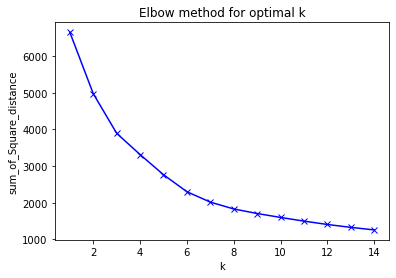

In [59]:
#Elbow method to minimize WSS (Within cluster sum of Square)
#Phương pháp tìm ra số cụm tối ưu 
sum_of_Square_distance=[]
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df_km_input)
    sum_of_Square_distance.append(km.inertia_)

plt.plot(K,sum_of_Square_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_Square_distance')
plt.title('Elbow method for optimal k')
plt.show()

In [60]:
km = KMeans(n_clusters=3,tol=1e-4,max_iter=300)
y_predicted = km.fit_predict(df_km_input)

df_km_data['Labels_sklearn'] = y_predicted
df_km_data

,Age,Income,Recency,Labels_sklearn
0,57,58138.0,58,2
1,60,46344.0,38,2
2,49,71613.0,26,2
3,30,26646.0,26,1
4,33,58293.0,94,0
...,...,...,...,...
2211,47,61223.0,46,2
2212,68,64014.0,56,2
2213,33,56981.0,91,0
2214,58,69245.0,8,2


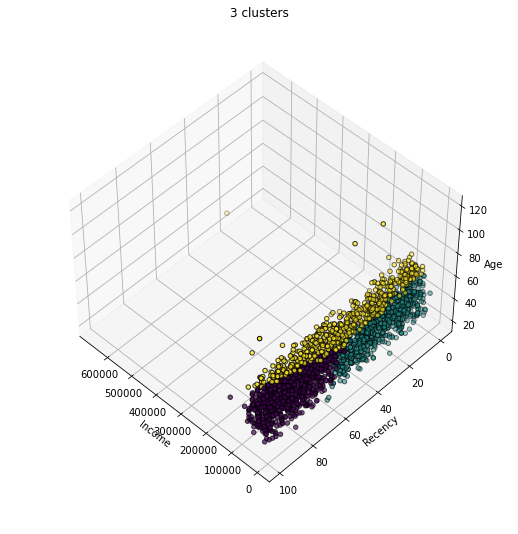

In [61]:
import mpl_toolkits.mplot3d  # noqa: F401

fignum = 1
titles = ["3 clusters"]
fig = plt.figure(fignum, figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
labels = km.labels_
ax.scatter(df_km_data.iloc[:,1], df_km_data.iloc[:, 2], df_km_data.iloc[:,0], c=labels.astype(float), edgecolor="k")

ax.set_xlabel("Income")
ax.set_ylabel("Recency")
ax.set_zlabel("Age")

ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1

## <font color='blue'> K-Means Toán học </font>

In [62]:
def initiate_centroids(k, dset):
  '''
  Select k data points as centroids
  k: number of centroids
  dset: pandas dataframe
  '''
  centroids = dset.sample(k)
  return centroids

In [63]:
def kmeans_cluster_math(df_km_input,k_cluster,max_iter=300,tol=1e-4):
  df_working = df_km_input.copy()
  df_centroids = initiate_centroids(k_cluster, df_working).reset_index(drop=True)

  loop = True
  i = 0
  while loop:
    i +=1
    print(f"Vòng {i}")
    label_centroids = []
    for id_data,data_point in df_working.iterrows():
      dict_distance = {}
      dict_distance['distance'] = []
      dict_distance['label_centroids'] = []
      for id_centroid, centroid_point in df_centroids.iterrows():
        dict_distance['distance'].append(euclidean_distance(data_point,centroid_point))
        dict_distance['label_centroids'].append(id_centroid)
      df = pd.DataFrame(dict_distance)
      label_centroids.append(df[(df['distance']) == (df['distance'].min())]['label_centroids'].iat[0])

    df_working['label_centroids'] = label_centroids
    df_centroids_update = df_working.groupby('label_centroids').agg('mean').loc[:, ['Age','Income','Recency']].reset_index(drop = True)

    for (id,centr),(id_upt,centr_upt) in zip(df_centroids.iterrows(),df_centroids_update.iterrows()):
      if euclidean_distance(centr,centr_upt) <= tol :
        error_centroid = False
      else:
        error_centroid = True
        break
    
    if error_centroid:
      df_centroids = df_centroids_update
      loop = True
      if i > max_iter :
        loop = False
    else:
      loop = False

  return df_working

df_working = kmeans_cluster_math(df_km_input,k_cluster = 3,max_iter=300,tol=1e-4)

Vòng 1
Vòng 2
Vòng 3
Vòng 4
Vòng 5
Vòng 6
Vòng 7
Vòng 8
Vòng 9
Vòng 10
Vòng 11
Vòng 12
Vòng 13
Vòng 14
Vòng 15
Vòng 16
Vòng 17
Vòng 18
Vòng 19
Vòng 20
Vòng 21
Vòng 22
Vòng 23
Vòng 24
Vòng 25
Vòng 26
Vòng 27
Vòng 28
Vòng 29
Vòng 30
Vòng 31
Vòng 32
Vòng 33
Vòng 34
Vòng 35
Vòng 36
Vòng 37
Vòng 38
Vòng 39
Vòng 40
Vòng 41
Vòng 42
Vòng 43
Vòng 44
Vòng 45
Vòng 46
Vòng 47
Vòng 48
Vòng 49
Vòng 50
Vòng 51
Vòng 52
Vòng 53
Vòng 54
Vòng 55
Vòng 56
Vòng 57
Vòng 58
Vòng 59
Vòng 60
Vòng 61
Vòng 62
Vòng 63
Vòng 64
Vòng 65
Vòng 66
Vòng 67
Vòng 68
Vòng 69
Vòng 70
Vòng 71
Vòng 72
Vòng 73
Vòng 74
Vòng 75
Vòng 76
Vòng 77
Vòng 78
Vòng 79
Vòng 80
Vòng 81
Vòng 82
Vòng 83
Vòng 84


In [64]:
df_km_data['Labels_math'] = df_working['label_centroids']

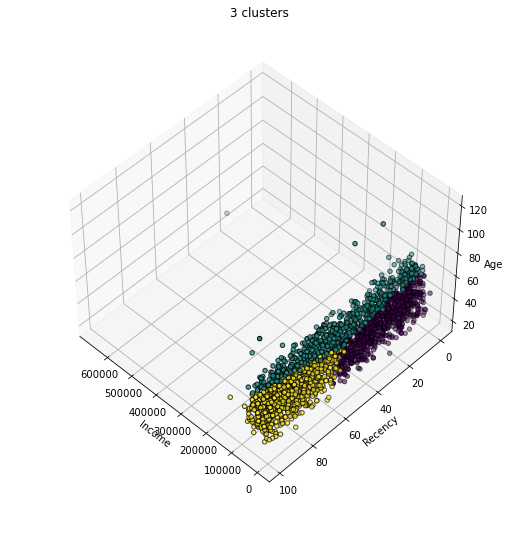

In [65]:
import mpl_toolkits.mplot3d  # noqa: F401

fignum = 1
titles = ["3 clusters"]
fig = plt.figure(fignum, figsize=(8, 7))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 1, 1])
labels = df_km_data['Labels_math']
ax.scatter(df_km_data.iloc[:,1], df_km_data.iloc[:, 2], df_km_data.iloc[:,0], c=labels.astype(float), edgecolor="k")

ax.set_xlabel("Income")
ax.set_ylabel("Recency")
ax.set_zlabel("Age")

ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1

# <font color='green'>NAIVE BAYES</font>

## <font color='blue'> Navie Bayes Data </font>
- Sử dụng lại dataset dự đoán sales ở LR

In [66]:
df_nb_data = pd.read_csv('Nhom11_LR_data.csv')
print(f'Dữ liệu gồm: {(df_nb_data.shape[0]):,} dòng và {df_nb_data.shape[1]} cột')
df_nb_data.head()

Dữ liệu gồm: 200 dòng và 4 cột


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,2210
1,44.5,39.3,45.1,1040
2,17.2,45.9,69.3,930
3,151.5,41.3,58.5,1850
4,180.8,10.8,58.4,1290


In [67]:
df_nb_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


In [68]:
df_nb_data['labels_sales'] = df_nb_data.apply(lambda x: 'High' if x['sales'] > 2000 else ('Medium' if x['sales'] >= 1200 else 'Low'),axis=1)
df_nb_data = df_nb_data.drop('sales',axis= 1)
print(f'Dữ liệu gồm: {(df_nb_data.shape[0]):,} dòng và {df_nb_data.shape[1]} cột')
df_nb_data.head()

Dữ liệu gồm: 200 dòng và 4 cột


,TV,radio,newspaper,labels_sales
0,230.1,37.8,69.2,High
1,44.5,39.3,45.1,Low
2,17.2,45.9,69.3,Low
3,151.5,41.3,58.5,Medium
4,180.8,10.8,58.4,Medium


## <font color='blue'> Navie Bayes sklearn </font>

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
X = df_nb_data.drop('labels_sales',axis= 1)
y = df_nb_data['labels_sales']
display(X)
display(y)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


0        High
1         Low
2         Low
3      Medium
4      Medium
        ...  
195       Low
196       Low
197    Medium
198      High
199    Medium
Name: labels_sales, Length: 200, dtype: object

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size=0.8)

NBModel = GaussianNB()
NBModel.fit(X_train,y_train)

predictions = NBModel.predict(X_test)

df_nb_test = X_test
df_nb_test['Class_Actual'] = list(y_test)

df_nb_predicted = df_nb_test.copy()
df_nb_predicted['Classs_Predict_sklearn'] = list(predictions)

df_nb_predicted

,TV,radio,newspaper,Class_Actual,Classs_Predict_sklearn
126,7.8,38.9,50.6,Low,Low
104,238.2,34.3,5.3,High,Medium
99,135.2,41.7,45.9,Medium,Medium
92,217.7,33.5,59.0,Medium,High
111,241.7,38.0,23.2,High,High
167,206.8,5.2,19.4,Medium,Medium
116,139.2,14.3,25.6,Medium,Medium
96,197.6,3.5,5.9,Low,Medium
52,216.4,41.7,39.6,High,High
69,216.8,43.9,27.2,High,High


In [72]:
accuracy_score(list(df_nb_predicted['Class_Actual']),list(df_nb_predicted['Classs_Predict_sklearn']))

0.75

## <font color='blue'> Navie Bayes Toán học </font>

In [73]:
def cal_likelihood(df,dimension,c,input_value):

  dimension = list(df[df['classes']==c][dimension])
  mean = np.mean(dimension)
  sd = np.std(dimension)

  likelihood = (1/math.sqrt(2*np.pi*sd)) * np.exp(-0.5*((input_value-mean)/sd)**2)
  
  return likelihood

def cal_prior(df, c):
  prior = (list(df['classes']).count(c))/len(list(df['classes']))
  return prior

In [74]:
# def GaussianNB_math(X_train, y_train, X_test, y_test):
input_dimensions = X_train.columns

df_nb_train = X_train.copy()
df_nb_train['classes'] = list(y_train)

df_nb_test = X_test.copy()
df_nb_test['classes'] = list(y_test)

list_class = list(df_nb_train['classes'].unique())
classes_nb_output = []
for id,row in df_nb_test.iterrows():
  dict_prob = {}
  dict_prob['classes'] = []
  dict_prob['posterior'] = []
  for c in list_class:
    multi_likelihood = 1
    for dimension in input_dimensions:
      multi_likelihood = multi_likelihood * cal_likelihood(df_nb_train,dimension=dimension,c=c,input_value=row[dimension])
    prior = cal_prior(df_nb_train, c=c)
    
    posterior = multi_likelihood*prior
    dict_prob['classes'].append(c)
    dict_prob['posterior'].append(posterior)
  df_prob = pd.DataFrame(dict_prob)
  classes_nb_output.append(df_prob[(df_prob['posterior']) == (df_prob['posterior'].max())]['classes'].iat[0])

df_nb_predicted['Class_Predict_math'] = classes_nb_output

In [75]:
df_nb_predicted

,TV,radio,newspaper,Class_Actual,Classs_Predict_sklearn,Class_Predict_math
126,7.8,38.9,50.6,Low,Low,Low
104,238.2,34.3,5.3,High,Medium,Medium
99,135.2,41.7,45.9,Medium,Medium,Medium
92,217.7,33.5,59.0,Medium,High,Medium
111,241.7,38.0,23.2,High,High,High
167,206.8,5.2,19.4,Medium,Medium,Medium
116,139.2,14.3,25.6,Medium,Medium,Medium
96,197.6,3.5,5.9,Low,Medium,Medium
52,216.4,41.7,39.6,High,High,High
69,216.8,43.9,27.2,High,High,High


In [76]:
accuracy_score(list(df_nb_predicted['Class_Actual']),list(df_nb_predicted['Class_Predict_math']))

0.725